## Simulated Annealing

In [1]:
import gzip
import csv
import random
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def readData(filename):
    
    data = []
    with gzip.open(filename, 'rt') as f:

        tsv_reader = csv.reader(f, delimiter="\t")
        row = next(tsv_reader)
        
        while(row != ['EOF']):
            if row[0][0].isdigit():
                elements = row[0].split(" ")
                final = []
                for ele in elements:
                    if ele != '':
                        final.append(ele)

                data.append([float(final[1]), float(final[2])])
            row = next(tsv_reader)
            
    data = np.array(data)
    
    return data

In [3]:
def length_of_tour(Initial_tour, distance):
    round_tour = Initial_tour[1:]
    round_tour.append(Initial_tour[0])
    total_distance = 0
    for i, j in zip(Initial_tour, round_tour):
        total_distance += distance[i][j]
        
    return total_distance

In [4]:
def simulatedAnnealing():
    
    
    #filename             = 'data/att532.tsp.gz'
    filename             = 'data/eil76.tsp.gz'
    data                 = readData(filename)
    
    start_time = time.time()
    
    Rounds               = 100000
    Initial_temperature  = 1000
    Final_temperature    = 0.00000001
    cooling_rate         = 0.995
    
    data_transpose       = data[:, np.newaxis]
    difference           = np.square(data_transpose - data)
    distance             = np.sqrt(difference.sum(axis=2))
    
    
    length               = len(data)
    Initial_tour          = list(range(length))
    seed = 26
    random.seed(seed)
    random.shuffle(Initial_tour)
        
    Initial_tour_distance = length_of_tour(Initial_tour, distance)
    best_tour = Initial_tour[:]
    all_Tours = [Initial_tour]
    min_tour_distance  = Initial_tour_distance
    all_tour_distances = [Initial_tour_distance]
    
    current_tour                 = Initial_tour[:]
    current_tour_distance        = Initial_tour_distance
    current_temperature          = Initial_temperature
    current_round                = 0
    
    while (current_temperature >= Final_temperature) and (current_round < Rounds):
        #print(current_tour_distance)
        next_tour = current_tour[:]
        i = random.randint(2, length - 1)
        k = random.randint(0, length - 1)
        next_tour[i:(i+k)] = reversed(next_tour[i:(i+k)])
        next_tour_distance = length_of_tour(next_tour, distance)
        
        if next_tour_distance < current_tour_distance:
            current_tour_distance = next_tour_distance
            current_tour          = next_tour[:]
            if next_tour_distance < min_tour_distance:
                min_tour_distance = next_tour_distance
                best_tour         = next_tour[:]
                
        else:
            probability        = math.exp(-abs(next_tour_distance - current_tour_distance) / current_temperature)
            random_probability = random.random()
            #print(-abs(next_tour_distance - current_tour_distance),-abs(next_tour_distance - current_tour_distance) / current_temperature, probability, random_probability)
            if random_probability < probability:
                current_tour_distance = next_tour_distance
                current_tour          = next_tour[:]
                
        all_Tours.append(current_tour)
        all_tour_distances.append(current_tour_distance)
        current_temperature = current_temperature * cooling_rate
        current_round += 1
        
        
    print("Execution time:  %s seconds ---" % (time.time() - start_time))
    print("Distance of Best Tour found: ", all_tour_distances[-1])
    print("Plot for rounds: %d, Initial_temp: %d, Final_temp: %11.8f, cooling rate: %f" %(Rounds, Initial_temperature, Final_temperature, cooling_rate))
    plt.plot([i for i in range(len(all_tour_distances))], all_tour_distances)
    line_init = plt.axhline(y=Initial_tour_distance, color='r', linestyle='--')
    line_min = plt.axhline(y=min_tour_distance, color='g', linestyle='--')
    plt.legend([line_init, line_min], ['Initial_tour_distance', 'Optimized_tour_distance'])
    plt.title("Simulated Annealing")
    x = [i for i in range(len(all_tour_distances))]
    plt.text(x[len(x)//4], max(all_tour_distances), 'min cost: {} KM'.format(round(all_tour_distances[-1])), ha='left', va='center')
    plt.ylabel('Tour_length')
    plt.xlabel('Number of Rounds')
    
    plt.show()
    
    return all_tour_distances, data, all_Tours

Execution time:  0.20449304580688477 seconds ---
Distance of Best Tour found:  726.0992002952773
Plot for rounds: 100000, Initial_temp: 1000, Final_temp:  0.00000001, cooling rate: 0.995000


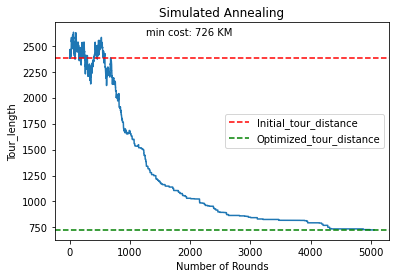

In [5]:
all_tour_distances, data, all_Tours = simulatedAnnealing()

In [6]:
def visualize(history, points):
    
    key_frames_mult = len(history) // 1000
    fig, ax = plt.subplots()
    line, = plt.plot([], [], lw=2)

    def init():
        x = [points[i][0] for i in history[0]]
        y = [points[i][1] for i in history[0]]
        plt.plot(x, y, 'co')
        extra_x = (max(x) - min(x)) * 0.05
        extra_y = (max(y) - min(y)) * 0.05
        ax.set_xlim(min(x) - extra_x, max(x) + extra_x)
        ax.set_ylim(min(y) - extra_y, max(y) + extra_y)
        ax.set_title("Visualization of tour for Simulated Annealing")
        line.set_data([], [])
        return line,

    def update(frame):
        x = [points[i, 0] for i in history[frame] + [history[frame][0]]]
        y = [points[i, 1] for i in history[frame] + [history[frame][0]]]
        
        line.set_data(x, y)
        return line


    anim = FuncAnimation(fig, update, frames=range(0, len(history), key_frames_mult),
                        init_func=init, interval=10, repeat=False)
    
    anim.save('file.png', fps=30)
    plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


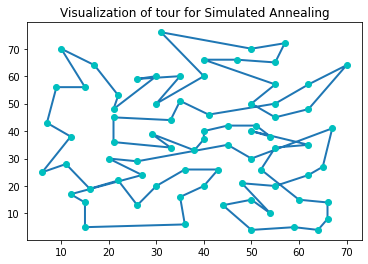

In [7]:
visualize(all_Tours, data)